In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
#rows and columns
df.shape

(32560, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
#datatypes of the columns
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
#check the null data in the columns
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
#no. of unique data in the column
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [9]:
#categorise the categorical and numerical columns
categorical=df.select_dtypes(include='object')
numerical=df.select_dtypes(exclude='object')

# EDA

                                             |                                             | [  0%]   00:00 ->…


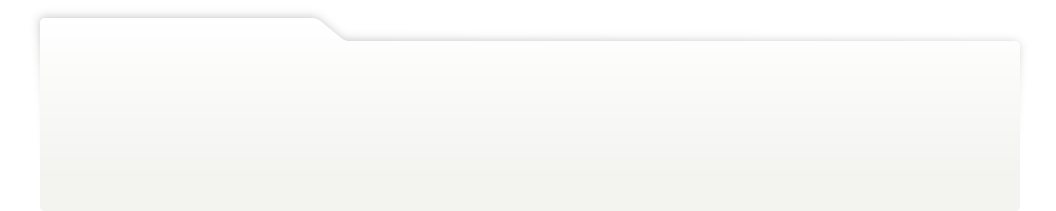
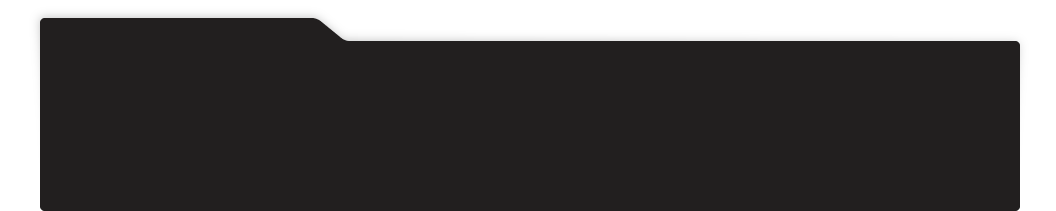
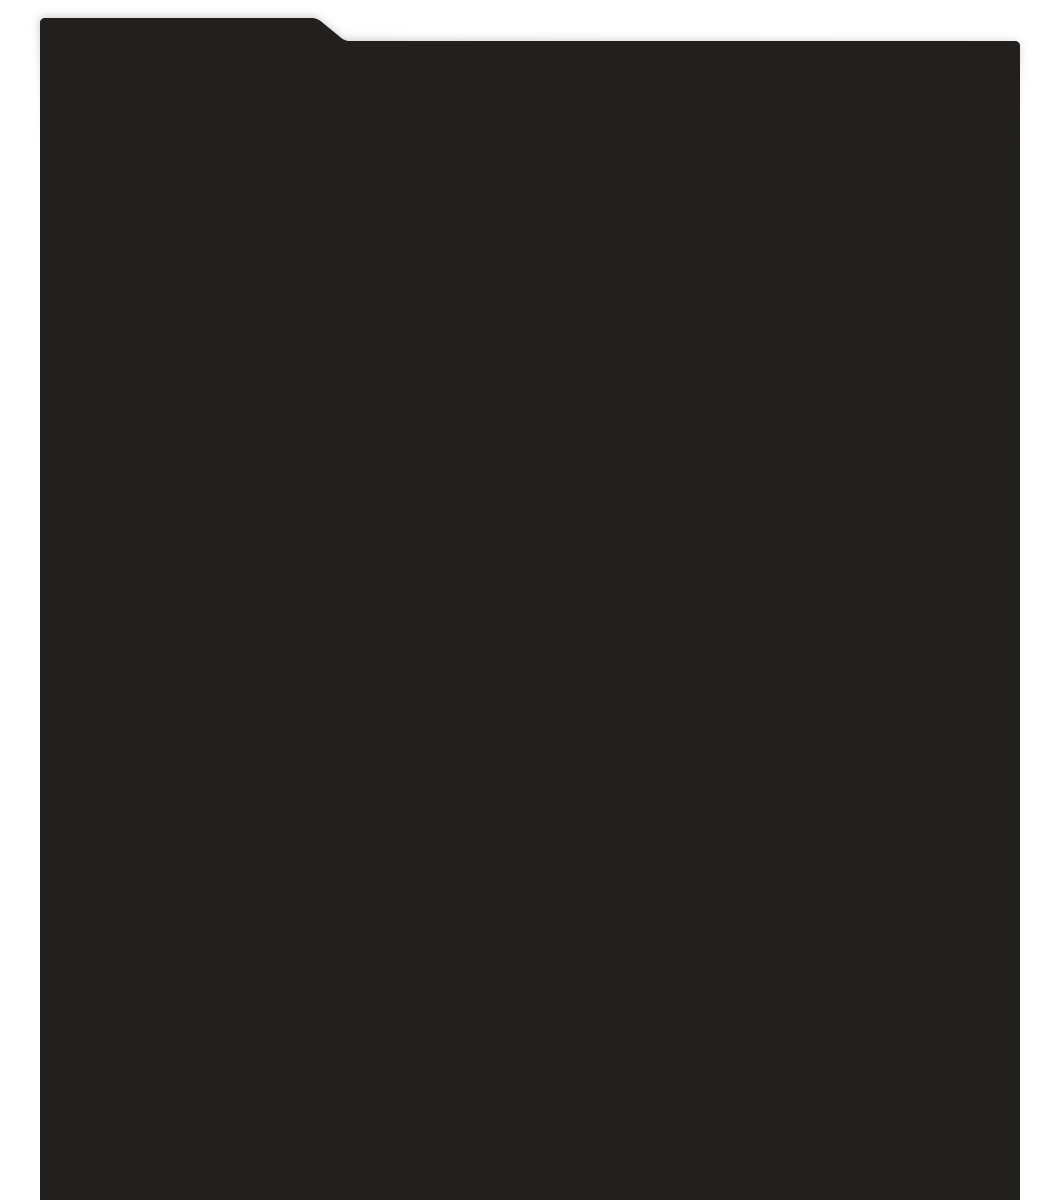
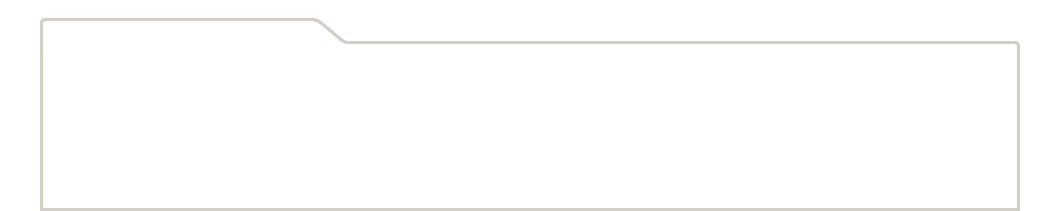
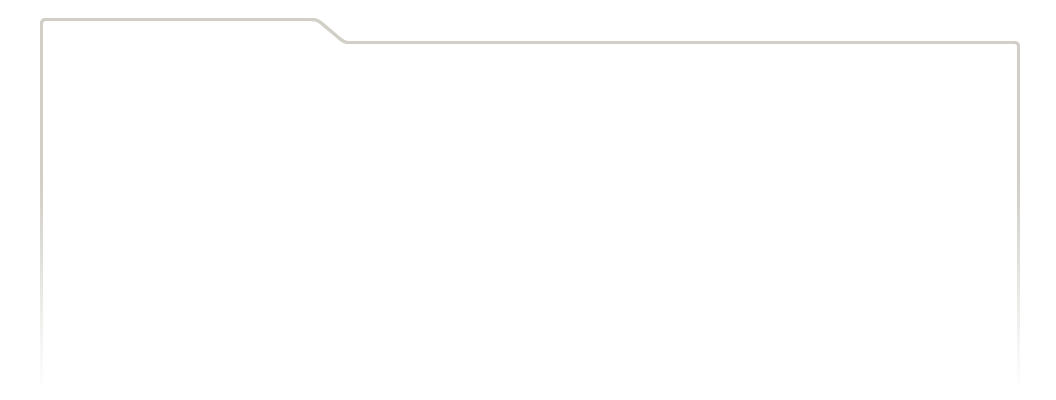
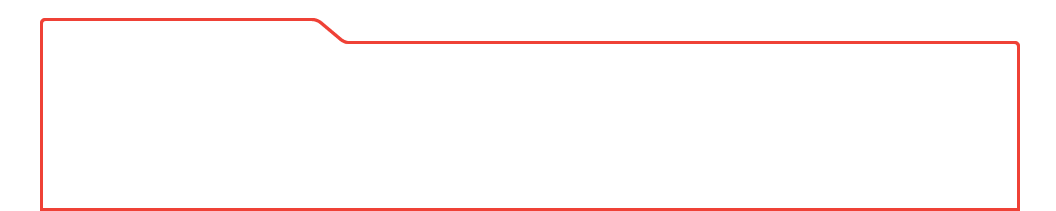
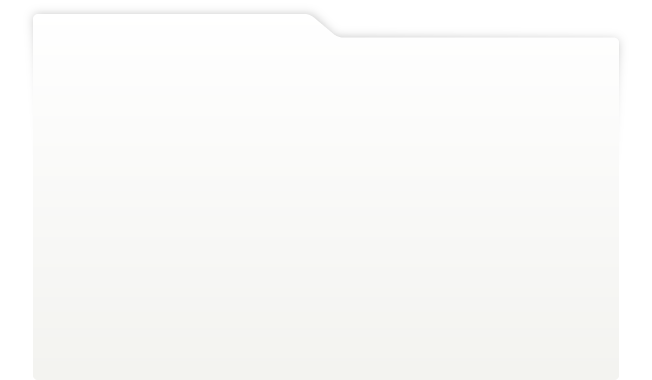
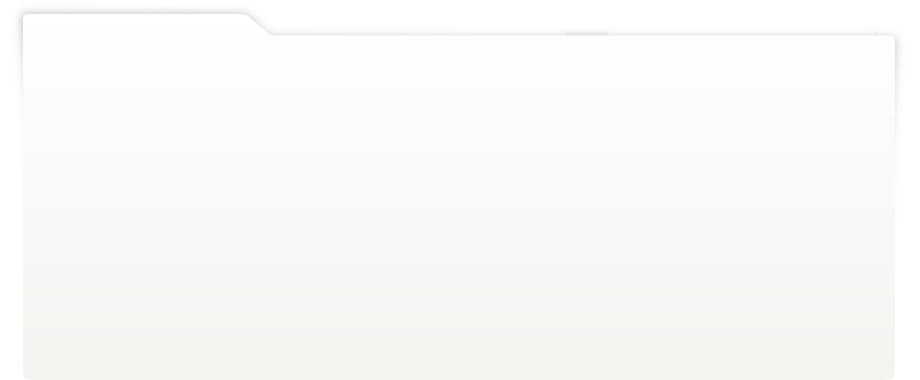
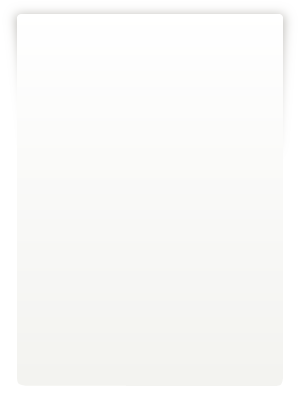
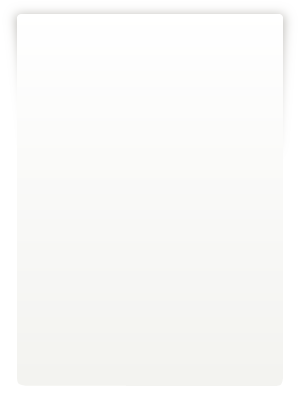
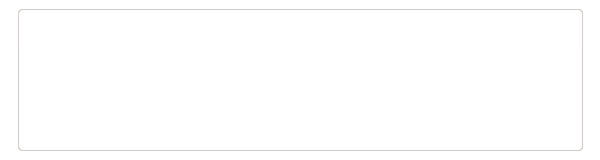
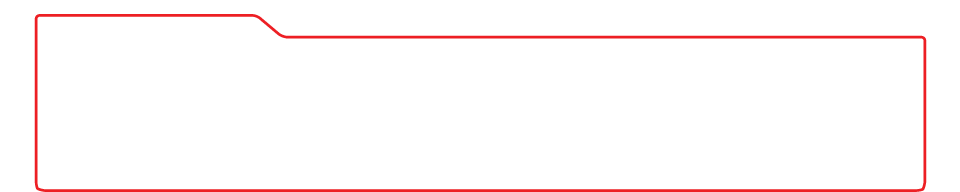
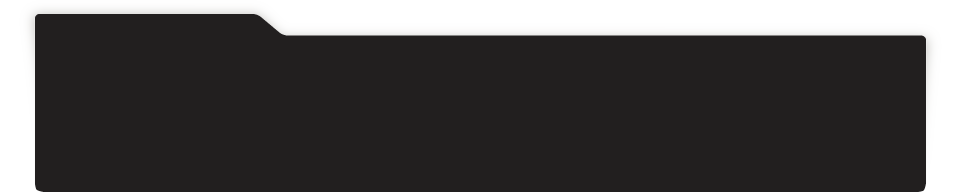
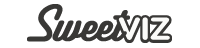
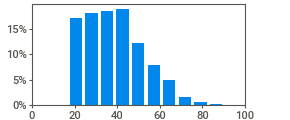
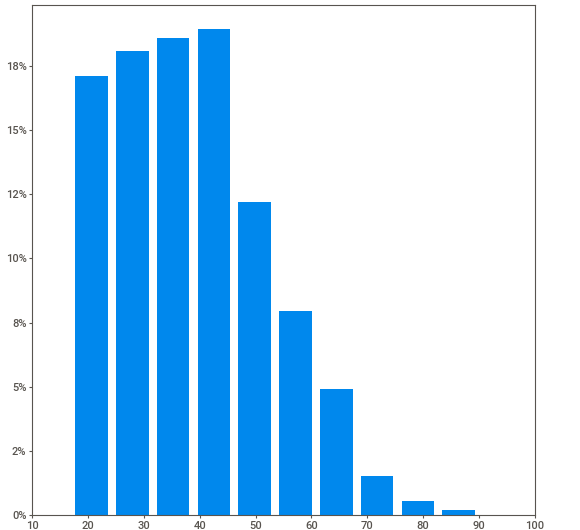
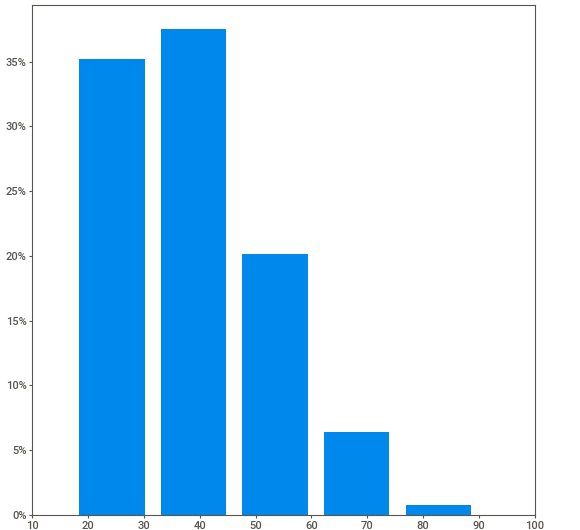
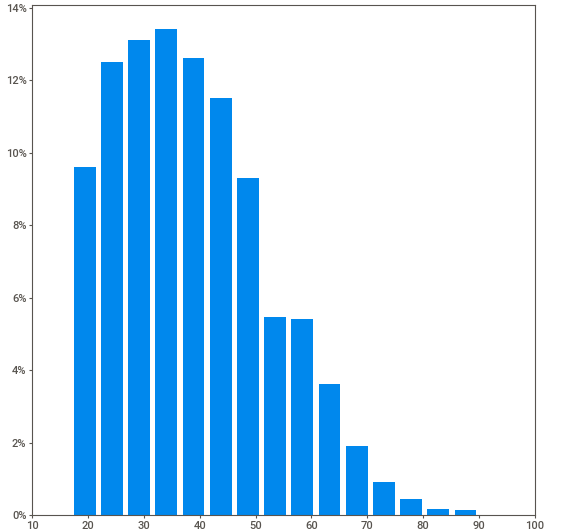
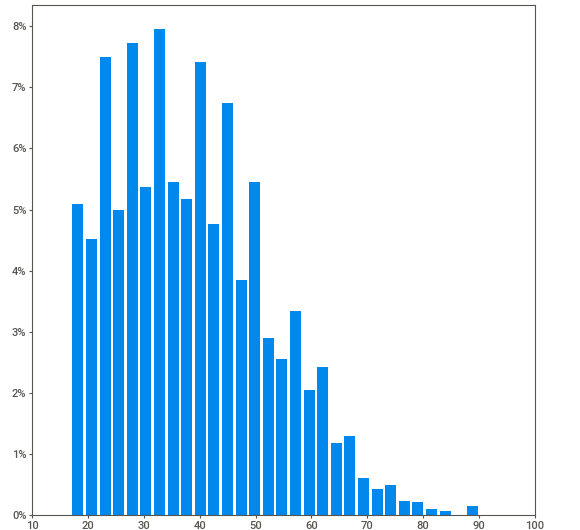
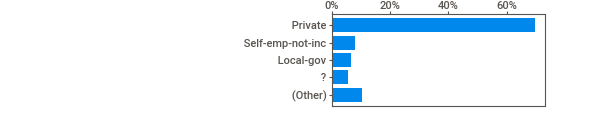
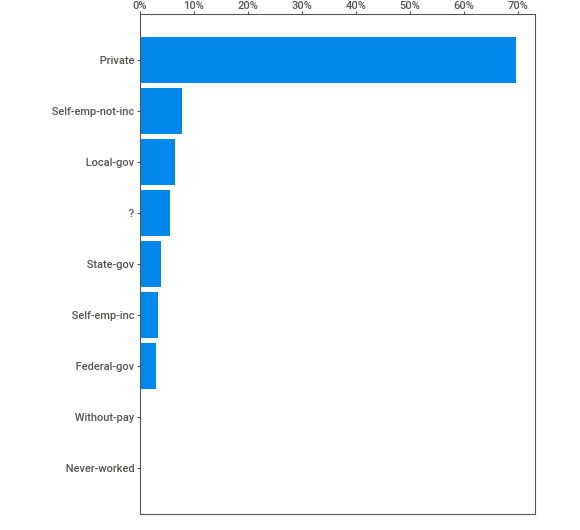
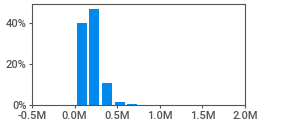
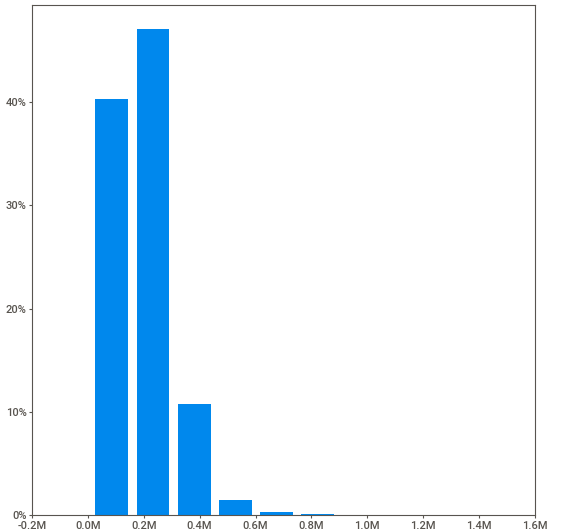
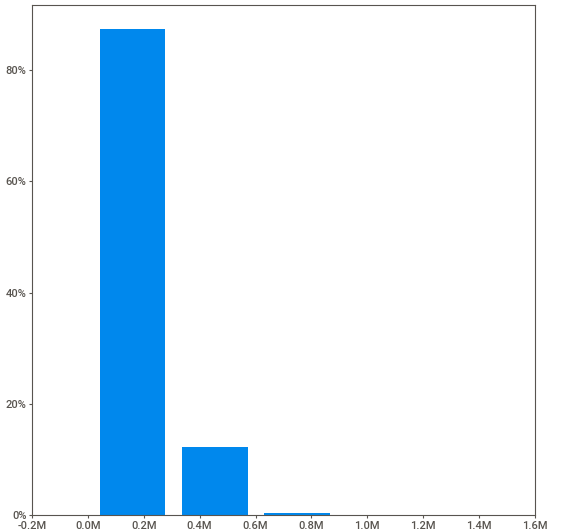
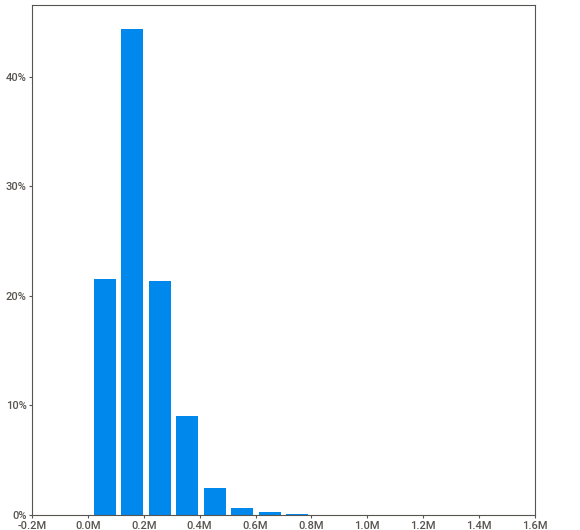
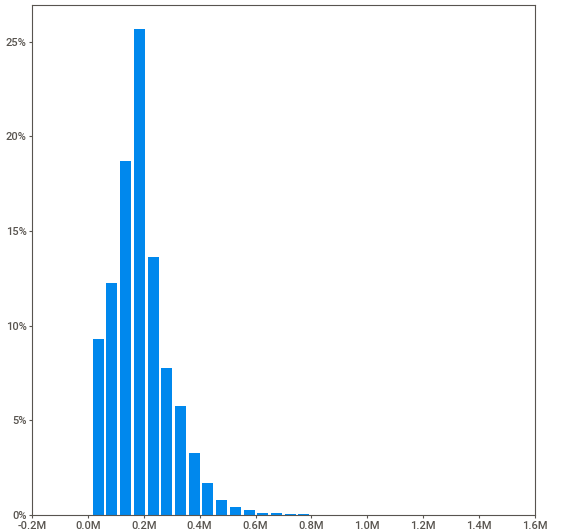
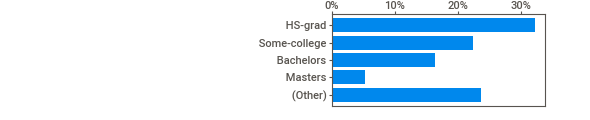
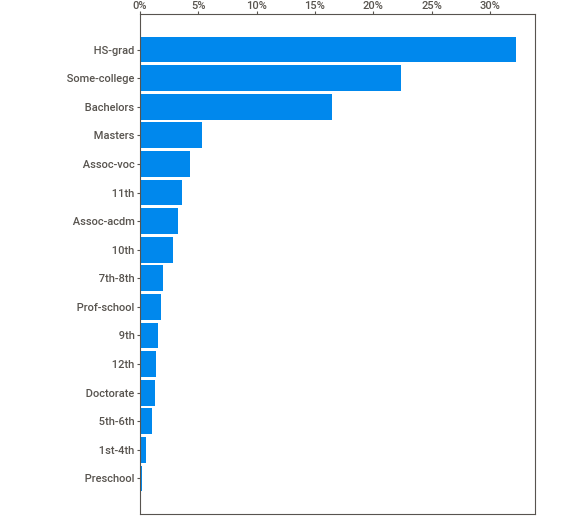
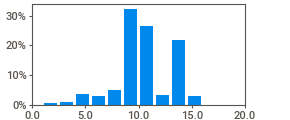
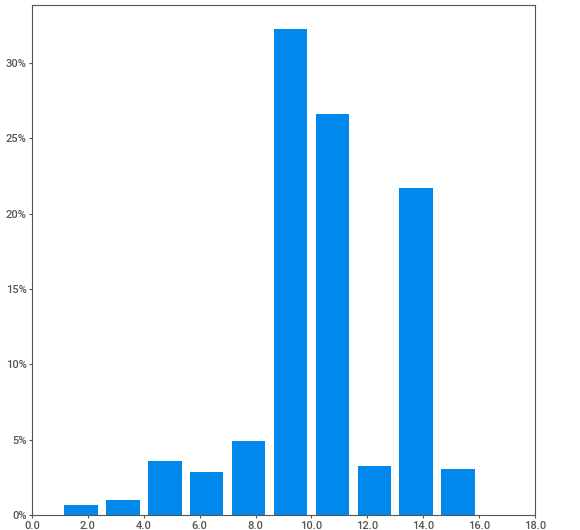
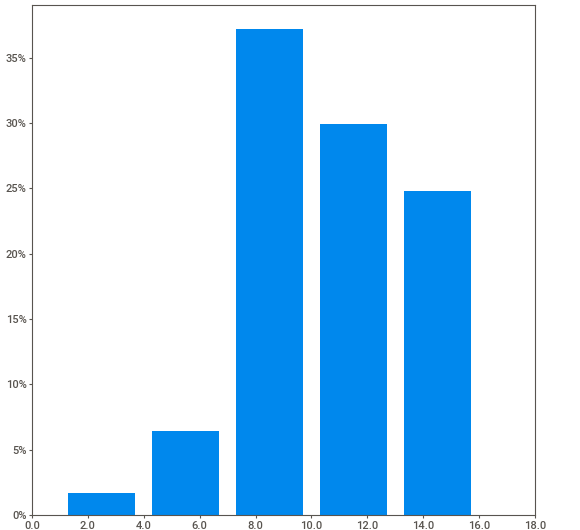
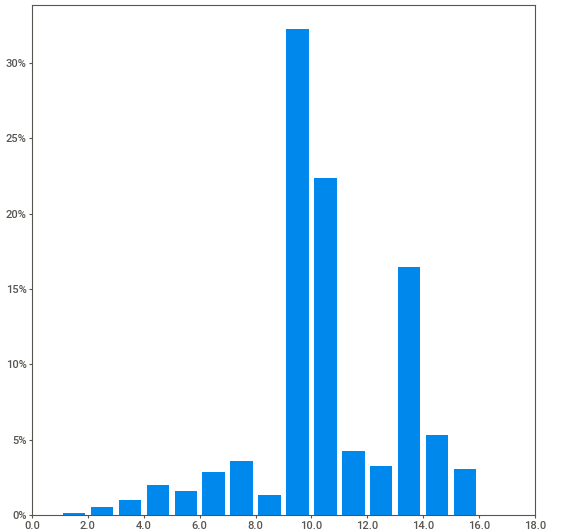
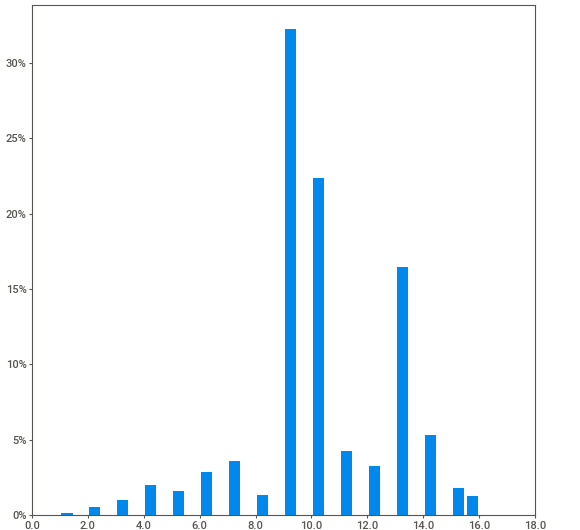
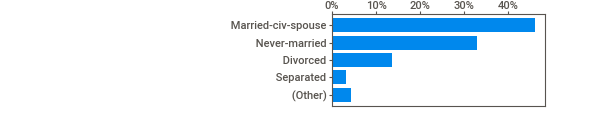
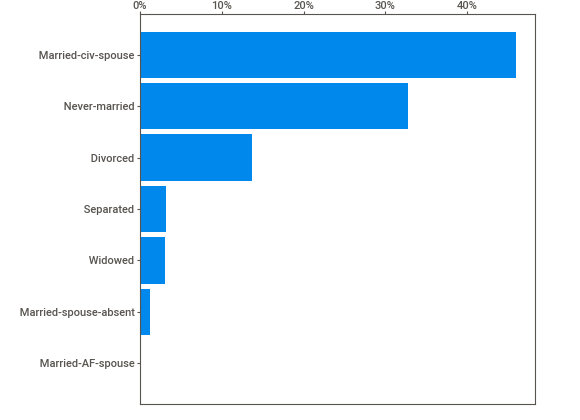
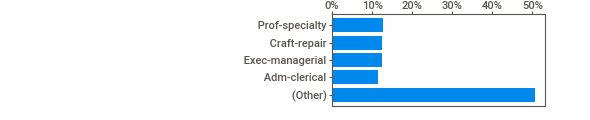
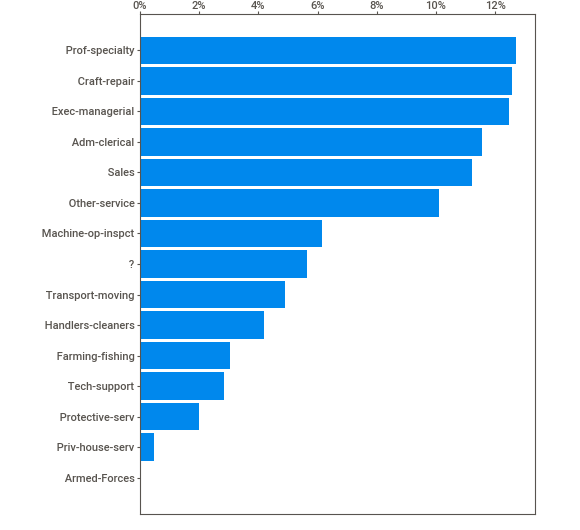
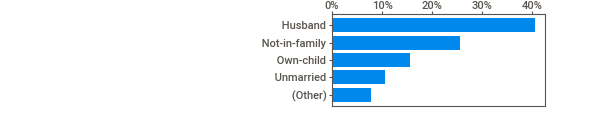
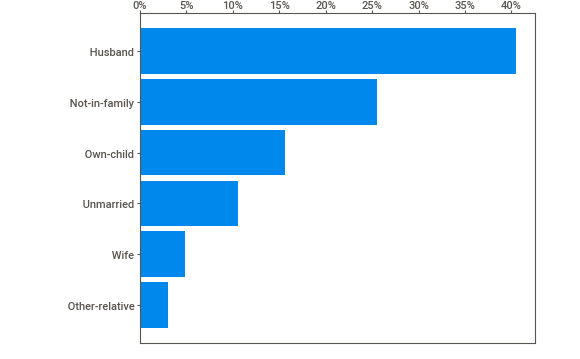
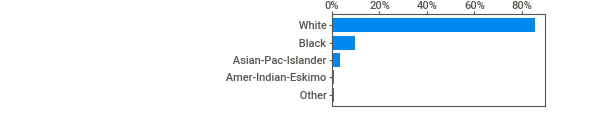
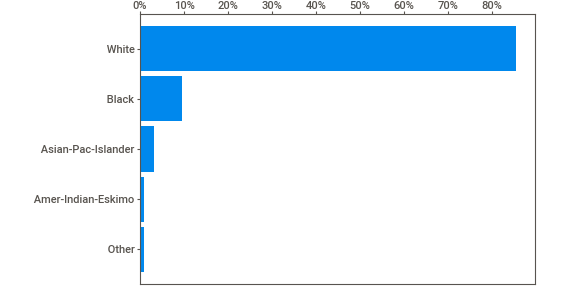
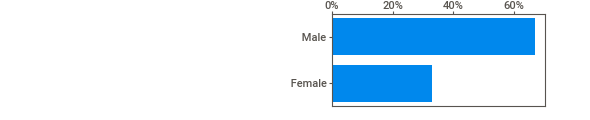
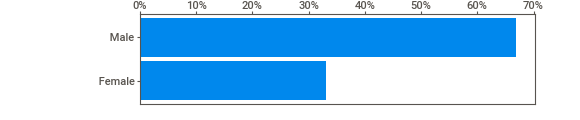
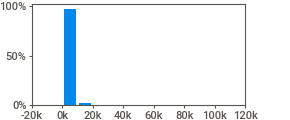
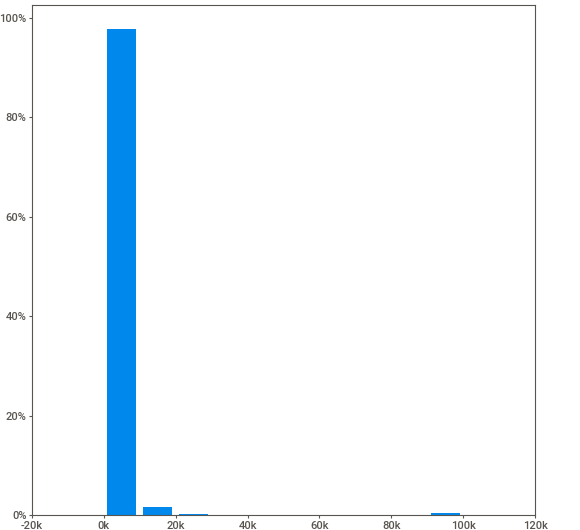
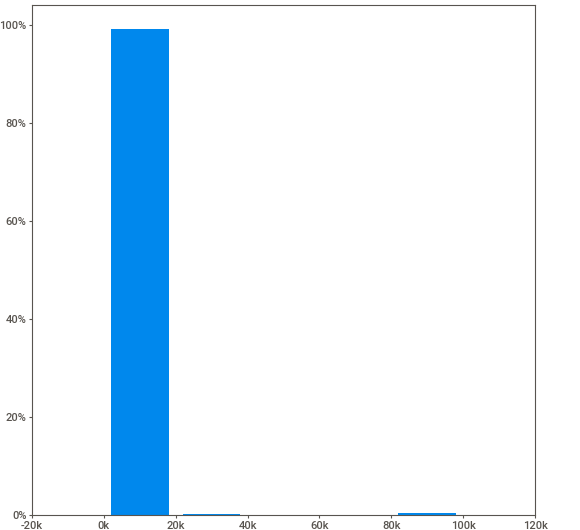
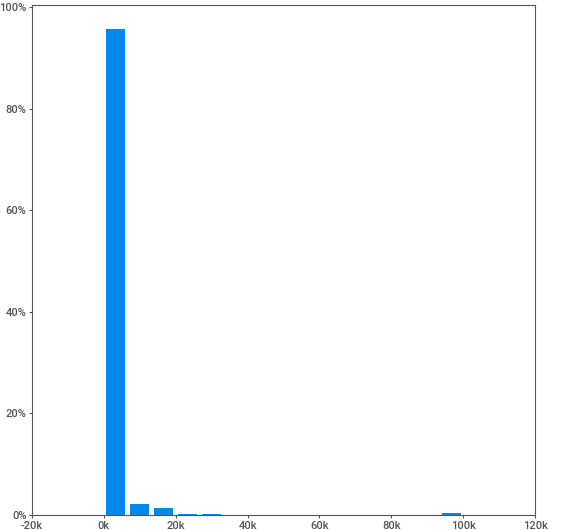
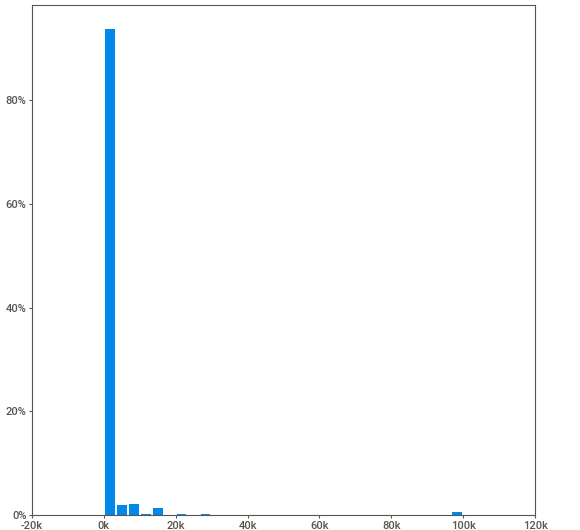
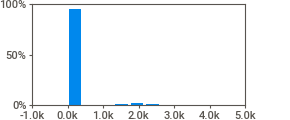
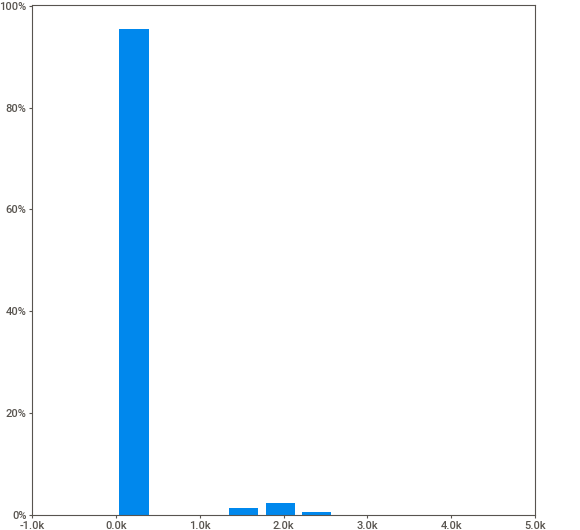
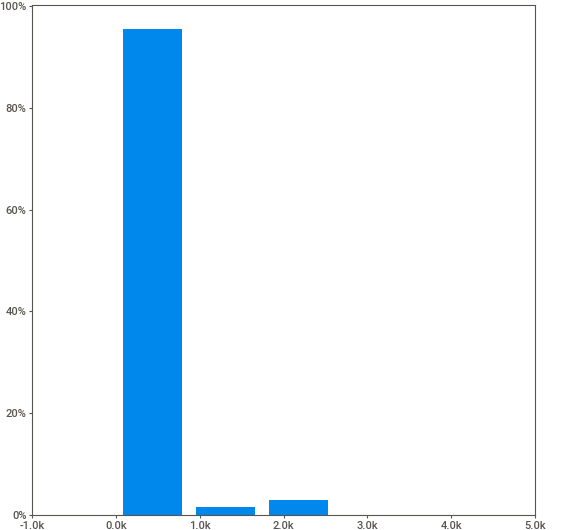
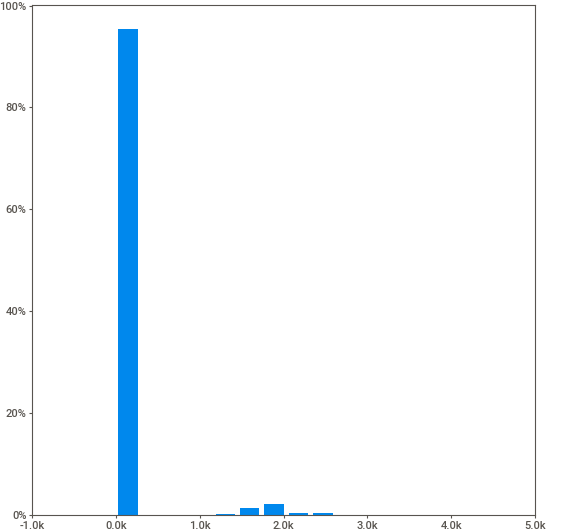
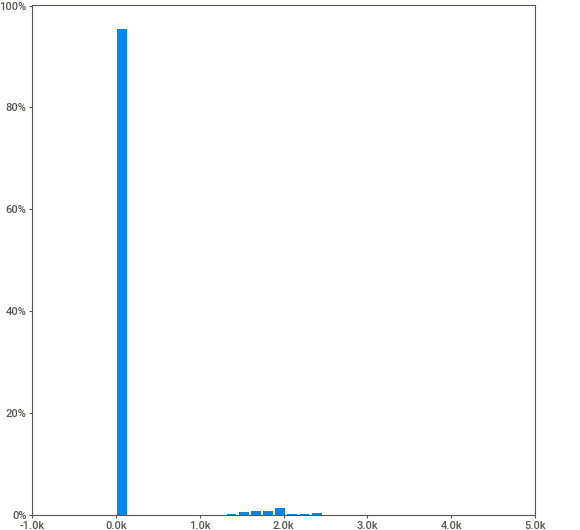
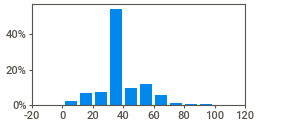
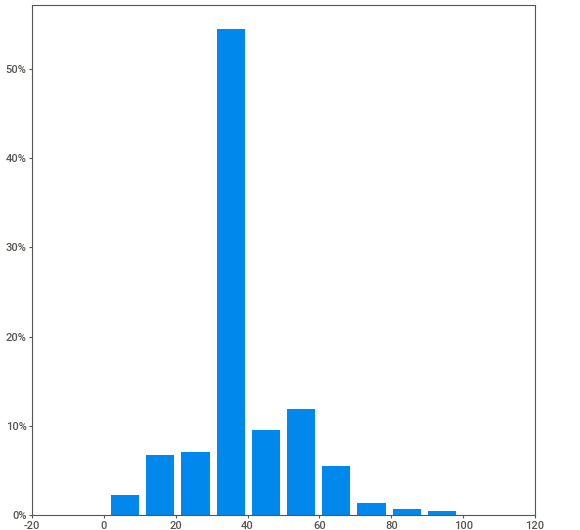
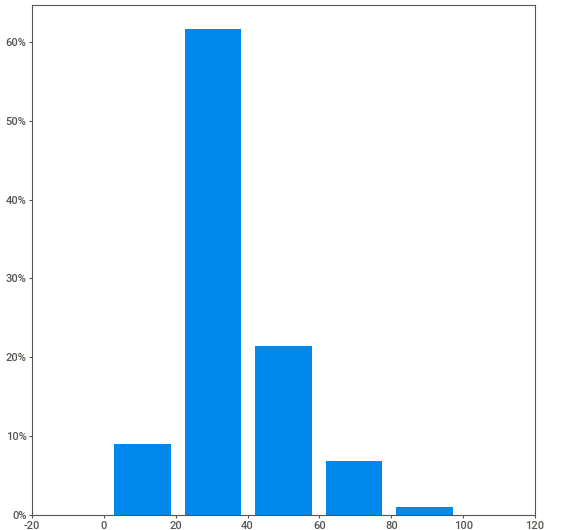
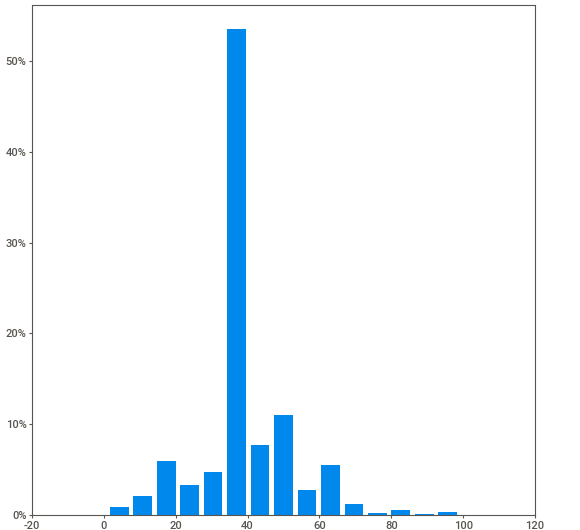
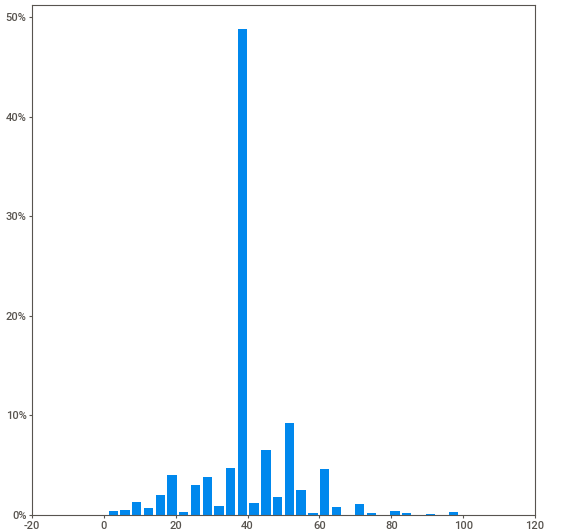
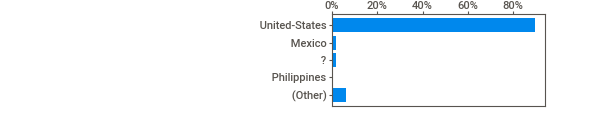
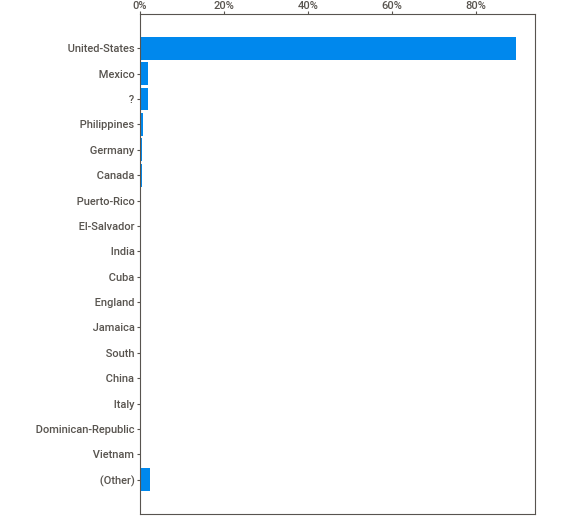
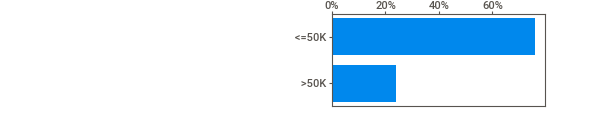
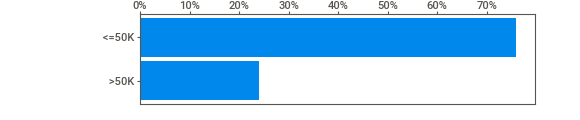
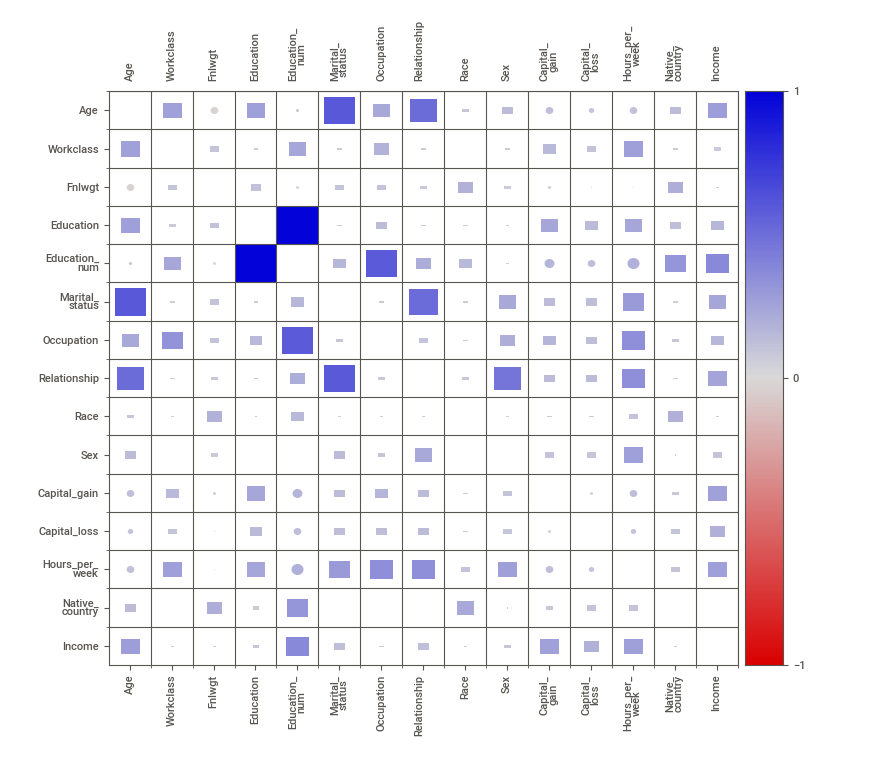
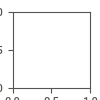

In [10]:
import sweetviz as sw
report = sw.analyze(df)
report.show_notebook(layout='vertical')

In [11]:
#drop the duplicate rows and check the shape of rows and columns
df.drop_duplicates(inplace=True)
df.shape

(32536, 15)

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

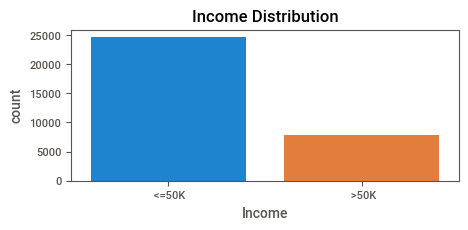

In [12]:
#income distribution
plt.figure(figsize=(5,2))
plt.title("Income Distribution")
sns.countplot(df['Income'],data=df)
df['Income'].value_counts()

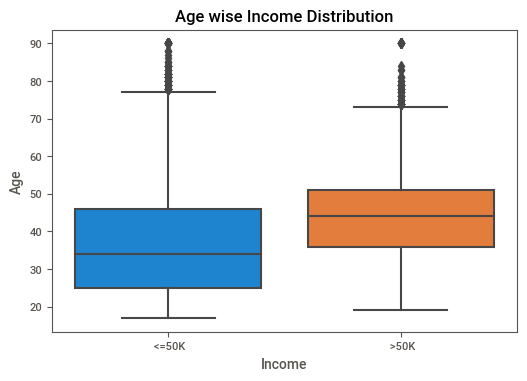

In [13]:
sns.boxplot(x='Income', y='Age', data=df)
plt.title("Age wise Income Distribution")
plt.show()

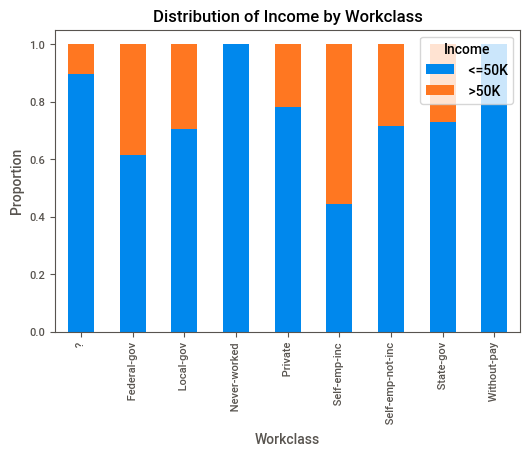

In [14]:
df.groupby('Workclass')['Income'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title("Distribution of Income by Workclass")
plt.xlabel("Workclass")
plt.ylabel("Proportion")
plt.show()

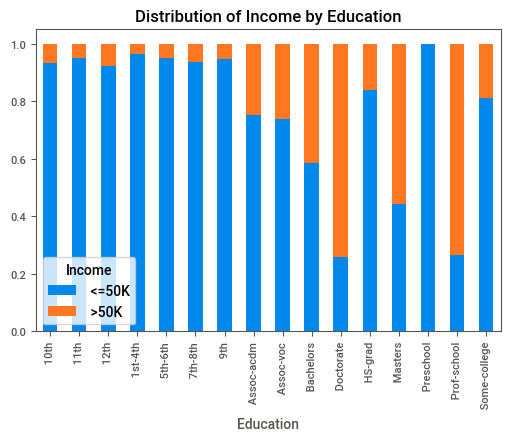

In [15]:
df.groupby('Education')['Income'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title("Distribution of Income by Education")
plt.xlabel("Education")
plt.show()

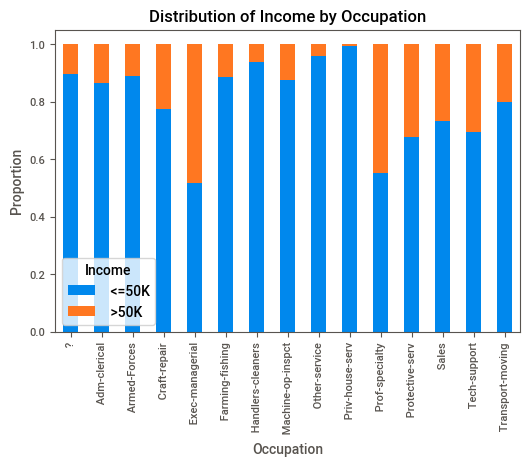

In [16]:
df.groupby('Occupation')['Income'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title("Distribution of Income by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Proportion")
plt.show()

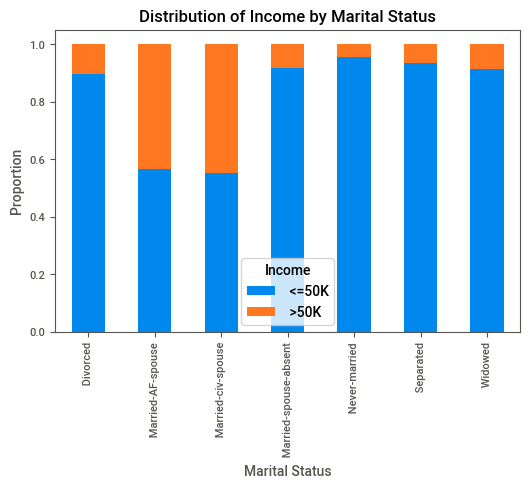

In [17]:
df.groupby('Marital_status')['Income'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title("Distribution of Income by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Proportion")
plt.show()

Sex      Income
 Female   <=50K     9583
          >50K      1179
 Male     <=50K    15114
          >50K      6660
Name: Income, dtype: int64

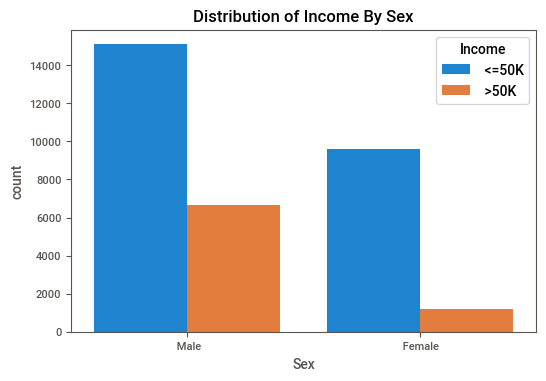

In [18]:
sns.countplot(x=df['Sex'],hue=df["Income"])
plt.title("Distribution of Income By Sex")
df.groupby('Sex')['Income'].value_counts()

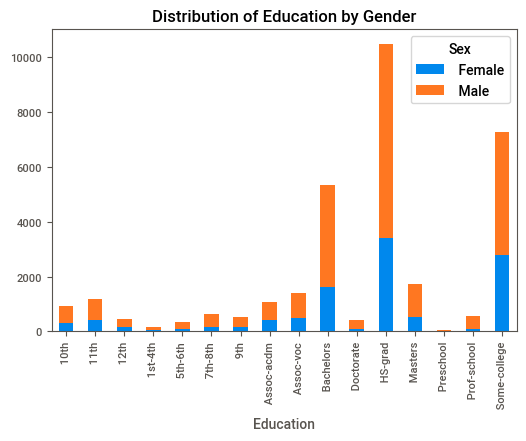

In [19]:
df.groupby(['Education', 'Sex']).size().unstack().plot(kind='bar', stacked=True)
plt.title("Distribution of Education by Gender")
plt.xlabel("Education")
plt.show()

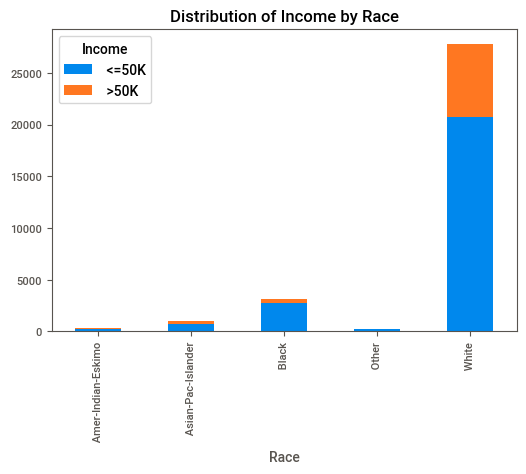

In [20]:
df.groupby(['Race', 'Income']).size().unstack().plot(kind='bar', stacked=True)
plt.title("Distribution of Income by Race")
plt.xlabel("Race")
plt.show()

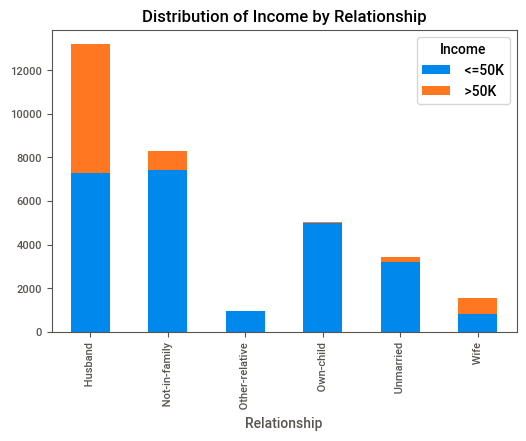

In [21]:
df.groupby(['Relationship', 'Income']).size().unstack().plot(kind='bar', stacked=True)
plt.title("Distribution of Income by Relationship")
plt.xlabel("Relationship")
plt.show()

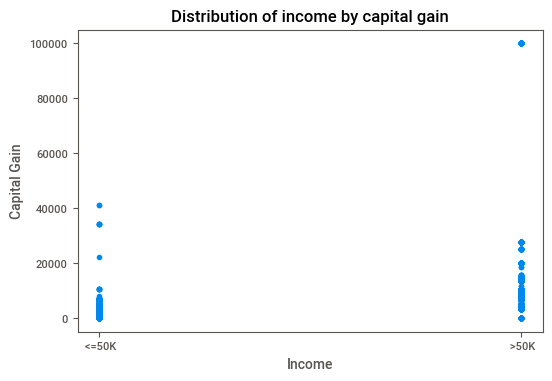

In [22]:
plt.scatter(y=df['Capital_gain'],x=df['Income'])
plt.title("Distribution of income by capital gain")
plt.xlabel("Income")
plt.ylabel("Capital Gain")
plt.show()

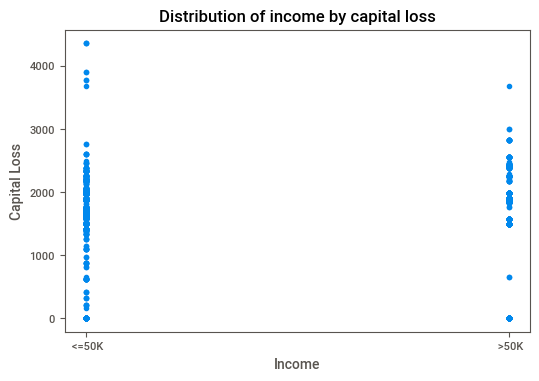

In [23]:
plt.scatter(y=df['Capital_loss'],x=df['Income'])
plt.title("Distribution of income by capital loss")
plt.xlabel("Income")
plt.ylabel("Capital Loss")
plt.show()

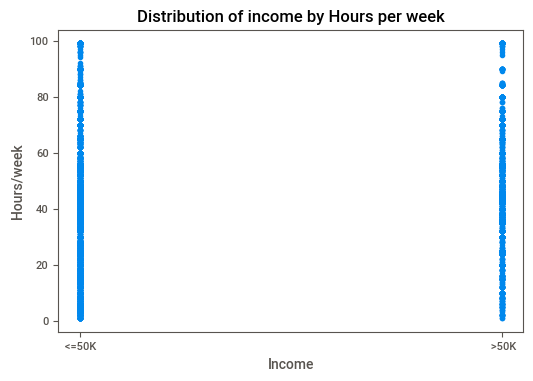

In [24]:
plt.scatter(y=df['Hours_per_week'],x=df['Income'])
plt.title("Distribution of income by Hours per week")
plt.xlabel("Income")
plt.ylabel("Hours/week")
plt.show()

<AxesSubplot:>

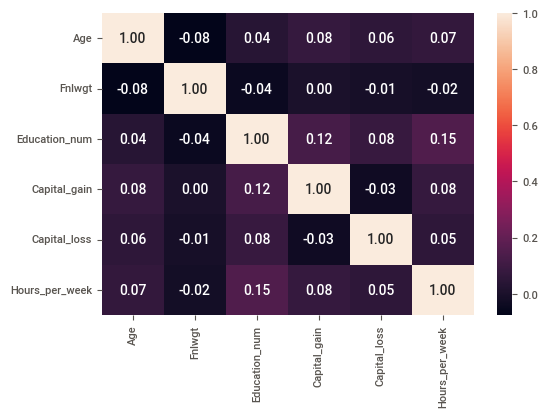

In [25]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")

In [26]:
for c in categorical:
    le=LabelEncoder()
    df[c]=le.fit_transform(df[c])

In [27]:
x=df.drop('Income',axis=1)
y=df['Income']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=32)

In [28]:
print("Shape of xtrain:",xtrain.shape)
print("Shape of xtest:",xtest.shape)
print("Shape of ytrain:",ytrain.shape)
print("Shape of ytest:",ytest.shape)

Shape of xtrain: (26028, 14)
Shape of xtest: (6508, 14)
Shape of ytrain: (26028,)
Shape of ytest: (6508,)


In [29]:
lr= LogisticRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)

print("Accuracy {0:.2f}%".format(100*accuracy_score(ypred, ytest)))
print("Confusion matrix:\n",confusion_matrix(ytest, ypred))
print("Classification report:\n",classification_report(ytest, ypred))

scores = cross_val_score(lr, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Accuracy 78.75%
Confusion matrix:
 [[4664  267]
 [1116  461]]
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      4931
           1       0.63      0.29      0.40      1577

    accuracy                           0.79      6508
   macro avg       0.72      0.62      0.64      6508
weighted avg       0.76      0.79      0.76      6508

Scores: [0.78902889 0.78546181 0.78761334 0.78561549 0.79237744]
Mean score: 0.788019393610342
Standard deviation: 0.0025493726000763188


In [30]:
dtc = DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)
ypred = dtc.predict(xtest)

print("Accuracy {0:.2f}%".format(100*accuracy_score(ypred, ytest)))
print("Confusion matrix:\n",confusion_matrix(ytest, ypred))
print("Classification report:\n",classification_report(ytest, ypred))

scores = cross_val_score(dtc, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Accuracy 81.41%
Confusion matrix:
 [[4297  634]
 [ 576 1001]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      4931
           1       0.61      0.63      0.62      1577

    accuracy                           0.81      6508
   macro avg       0.75      0.75      0.75      6508
weighted avg       0.82      0.81      0.82      6508

Scores: [0.80393362 0.80482557 0.80374981 0.81450745 0.80728446]
Mean score: 0.8068601833834282
Standard deviation: 0.004025906185507232


In [31]:
svc = SVC()
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)

print("Accuracy {0:.2f}%".format(100*accuracy_score(ypred, ytest)))
print("Confusion matrix:\n",confusion_matrix(ytest, ypred))
print("Classification report:\n",classification_report(ytest, ypred))

scores = cross_val_score(dtc, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Accuracy 79.43%
Confusion matrix:
 [[4922    9]
 [1330  247]]
Classification report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      4931
           1       0.96      0.16      0.27      1577

    accuracy                           0.79      6508
   macro avg       0.88      0.58      0.57      6508
weighted avg       0.83      0.79      0.73      6508

Scores: [0.80470191 0.80513293 0.8077455  0.81589058 0.80789919]
Mean score: 0.8082740217640895
Standard deviation: 0.004026368878949209


In [32]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
ypred = rfc.predict(xtest)

print("Accuracy {0:.2f}%".format(100*accuracy_score(ypred, ytest)))
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

scores = cross_val_score(rfc, x,y, cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Accuracy 85.60%
[[4609  322]
 [ 615  962]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4931
           1       0.75      0.61      0.67      1577

    accuracy                           0.86      6508
   macro avg       0.82      0.77      0.79      6508
weighted avg       0.85      0.86      0.85      6508

Scores: [0.85417947 0.85400338 0.85323498 0.86045797 0.85799908]
Mean score: 0.8559749752736614
Standard deviation: 0.0027861379413321777


# Save the model

In [33]:
# save the model to disk
filename = 'randomforest_model.sav'
joblib.dump(rfc, filename)

# load the model from disk
loaded_model = joblib.load(filename)

# make predictions using the loaded model
ypred = loaded_model.predict(xtest)

In [34]:
#show the predicted data
data=pd.DataFrame({'Income>50k':ytest,'Predicted Income>50k':ypred},columns=['Income>50k','Predicted Income>50k'])
data

,Income>50k,Predicted Income>50k
22882,0,0
22750,0,0
14718,0,0
31553,0,0
31404,1,1
...,...,...
2195,1,1
11535,0,0
24414,1,1
1147,1,0


# SUMMARY

Census Income Project

The prediction task is to determine whether a person makes over $50k a year

-Import libraries like Numpy, Pandas, Matplotlib, Seaborn, LabelEncoder, Traintestsplit, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, SupportVectorMachine, Accuracyscore, Classification report, Confusion matrix, cross_val_score
-load the dataset into df
-df has 32560 rows and 15 columns
-No null data in this dataset
-15 features where 9 categorical and 6 numerical data
-24 duplicates rows are also available in this dataset
-Explore each columns using sweetviz library that gave detailed information of each columns
-Income >50k: -People with age group of 35 to 50
                         -Workclass  of Self-emp-inc max 
                         -Education with Doctorate and Prof-school max 
                         -Occupation with Exec-managerial and Prof-speciality max
                         -Marital status Married-AF-spouse and Married-civ-spouse
                         -Male member has high income than female
-Educational background of HS-grad are mostly male
-White race has more income >50k
-Husband  have more income in relationship
-Capital gain has approax. 20000 for income>50k
-Capital loss has 1500 to 3000 for income>50k

-Using labelEncoder,categorical feature change into numerical feature
-Using 4 Algorithms to check best model: LogisticRegression(78.75%), DecisionTreeClassifier(81.25%), SupportVectorMachine(79.43%), RandomForestClassifier(85.93%)
-RandomForestClassifier has more accuracy.So it is the best model to predict.
-save the model and show the predicted data